# Import all the libraries

Basic

In [1]:
import numpy as np         
import pandas as pd  

Visualization

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

Train Test split for training and testing of data

In [3]:
from sklearn.model_selection import train_test_split

Mathematics and Algorithms

In [4]:
#function to get a mode of a dataset
from statistics import mode

#normalizing dataset
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#For resampling process to change the ratio of imbalanced ratio of the classes testing various ratios
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression

#resampling
from imblearn.over_sampling import SMOTE #Synthetic Minority Oversampling Technique

# Importing All the CSV files

In [5]:
train = pd.read_csv('train.csv')
campaign = pd.read_csv('campaign_data.csv')
coupon = pd.read_csv('coupon_item_mapping.csv')
demograph = pd.read_csv('customer_demographics.csv')
transaction = pd.read_csv('customer_transaction_data.csv')
item = pd.read_csv('item_data.csv')

Making the dictionary to save all the data "To update data and save them easily, a dictionary is created."

In [6]:
tables_data = {}
tables_data['train'] = train
tables_data['campaign'] = campaign
tables_data['coupon'] = coupon 
tables_data['demograph'] = demograph
tables_data['transaction'] = transaction 
tables_data['item'] = item

# Data Analysis

Train data

In [7]:
train.head(11) #Gives the first 10 values of data

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0
5,11,11,795,793,0
6,14,9,444,590,0
7,15,29,538,368,0
8,17,30,857,523,0
9,19,2,559,679,0


In [8]:
train.info() #Gives the information about train_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


In [9]:
len(train.campaign_id.unique()) #collect all the id and give exect number and length

18

In [10]:
D = train.redemption_status.value_counts() #Gives the count of 0's and 1's
D

0    77640
1      729
Name: redemption_status, dtype: int64

Text(0.5, 0, 'class')

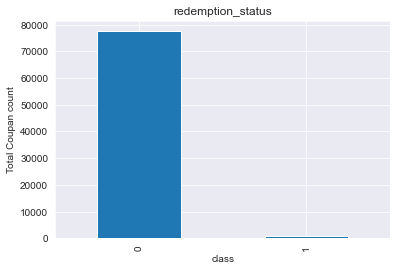

In [11]:
D.plot.bar()  #Graph
plt.title('redemption_status')
plt.ylabel('Total Coupan count')
plt.xlabel('class')

In [12]:
729/(78369)*100  #Getting Percentage of Redemption_status

0.930214753282548

We get 0.93% of coupan redemption_status

As we can see that data is havily tipped to one side we have to use either OVER or UNDER sampling

if we have to make class 0 data as class 1 to fit the orignal data we use (Under Sampling)
if we have to make class 1 data as class 0 to fit the orignal data we use (Over Sampling)

Let us see each campaign have unique set of coupons or do coupons overlap in different campaigns

In [13]:
coupon_use = {}
for coupons in train.coupon_id.unique():
    camp =  len(train[train.coupon_id==coupons].campaign_id.unique())  #camp = number of camp use the coupon
    if camp in coupon_use.keys():        #collect coupon ids that were used camp times
         coupon_use[camp].append(coupons)
    else:
         coupon_use[camp] = [coupons]

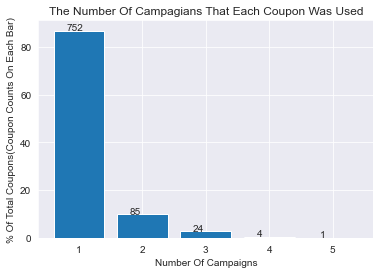

In [14]:
coupon_freq = {}  #coupon_frequency

for camp in coupon_use.keys():
    coupon_freq[camp]= len(coupon_use[camp])/len(train.coupon_id.unique())*100

plt.bar(coupon_freq.keys(),coupon_freq.values())

# Text on the top of each barplot
label = [len(x) for x in coupon_use.values()]
x_loc = np.array([x for x in coupon_freq.keys()])-0.2
y_loc = np.array([x for x in coupon_freq.values()]) + 0.1
for i in range(5):
    plt.text(x = x_loc[i] , y = y_loc[i], s = label[i], size = 10)
plt.title('The number of campagians that each coupon was used'.title())
plt.ylabel('% of total coupons(coupon counts on each bar)'.title())
plt.xlabel('number of campaigns'.title())
plt.show()

Campaign Data    

In [15]:
campaign.head(11) #Gives the first 10 values of data

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [16]:
campaign.info() #Gives information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    28 non-null     int64 
 1   campaign_type  28 non-null     object
 2   start_date     28 non-null     object
 3   end_date       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [17]:
len(campaign.campaign_id.unique()) #Gives all unoque values

28

There are 28 campaign

In [18]:
D = campaign.campaign_type.value_counts() #it counts X and Y values
D

Y    22
X     6
Name: campaign_type, dtype: int64

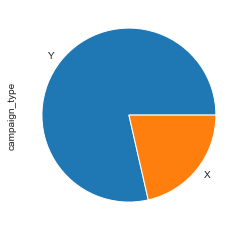

In [19]:
D.plot.pie() #graph

Coupan Data

In [20]:
coupon.head(11)  #Gives the first 10 values of data

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77
5,520,77
6,529,77
7,524,77
8,522,81
9,518,81


In [21]:
coupon.info() #it gives information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 1.4 MB


In [22]:
coupon.coupon_id.value_counts().sort_values() #it count all coupan id and make it unique and count number in ascending

53          1
929         1
54          1
1013        1
1086        1
        ...  
33       4394
31       4873
22       4947
23      11813
32      11814
Name: coupon_id, Length: 1116, dtype: int64

In [23]:
len(coupon.item_id.unique()) # find length of item_id

36289

In [24]:
len(coupon.coupon_id.unique()) # find length of coupon_id

1116

As we can see there are coupan that are used by multiple items.

Customer Demographics

In [25]:
demograph.head(11)  #Gives the first 10 values of data

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
5,11,70+,Single,0,2,NaN,1
6,12,46-55,Married,0,2,NaN,7
7,13,36-45,Single,0,1,NaN,2
8,14,26-35,Married,1,2,NaN,6
9,15,46-55,Married,0,2,NaN,6


In [26]:
demograph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [27]:
demograph.family_size.value_counts() #count the size of family

2     303
1     248
3     104
5+     57
4      48
Name: family_size, dtype: int64

In [28]:
demograph.marital_status.value_counts() #count number of married and single customer

Married    317
Single     114
Name: marital_status, dtype: int64

In [29]:
demograph.no_of_children.value_counts() #count the number of children 

1     107
3+     60
2      55
Name: no_of_children, dtype: int64

Customer Transaction Data

In [30]:
transaction.head(11)  #Gives the first 10 values of data

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
5,2012-01-02,1501,57397,1,71.24,-28.14,0.0
6,2012-01-02,857,12424,1,106.50,-14.25,0.0
7,2012-01-02,857,14930,1,110.07,0.00,0.0
8,2012-01-02,857,16657,1,89.05,-35.26,0.0
9,2012-01-02,67,10537,3,32.06,0.00,0.0


In [31]:
transaction.info() #gives the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1324566 non-null  object 
 1   customer_id      1324566 non-null  int64  
 2   item_id          1324566 non-null  int64  
 3   quantity         1324566 non-null  int64  
 4   selling_price    1324566 non-null  float64
 5   other_discount   1324566 non-null  float64
 6   coupon_discount  1324566 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [32]:
transaction.customer_id.value_counts() #count customer_id same number 

1555    4522
711     4173
464     4134
1475    3945
1011    3862
        ... 
1150      87
406       83
1180      83
907       80
1326      79
Name: customer_id, Length: 1582, dtype: int64

In [33]:
transaction.quantity.value_counts() # count the quantity of transection

1        1054059
2         188907
3          33094
4          18745
5           5382
          ...   
25030          1
4552           1
17208          1
8654           1
6147           1
Name: quantity, Length: 9252, dtype: int64

In [34]:
len(transaction[transaction.coupon_discount<0]) # gives the discount number 

21286

In [35]:
21286/1324566*100 #percentage

1.607016939888235

There are 1.6% of transactions that received coupon discounts.

In [36]:
#Inserting a new column to know if the coupon was used or not
transaction['coupon_used'] = transaction.coupon_discount.apply(lambda x: 1 if x !=0 else 0)

In [37]:
transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,coupon_used
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,0


In [38]:
#Converting the date column into date time
#Reset the index of the DataFrame, and use the default one instead.
transaction['date'] = pd.to_datetime(transaction['date'])
transaction = transaction.sort_values('date').reset_index(drop=True)

In [39]:
#Creating 3 new columns from the date column
transaction['day'] = transaction["date"].apply(lambda x: x.day)
transaction['dow'] = transaction["date"].apply(lambda x: x.weekday())
transaction['month'] = transaction["date"].apply(lambda x: x.month)

In [40]:
transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,coupon_used,day,dow,month
0,2012-01-02,1501,26830,1,35.26,-10.69,0.00,0,2,0,1
1,2012-01-02,464,20697,1,92.26,-21.37,-35.62,1,2,0,1
2,2012-01-02,464,20717,2,28.50,-27.78,0.00,0,2,0,1
3,2012-01-02,464,21008,1,35.26,-17.81,0.00,0,2,0,1
4,2012-01-02,464,22243,2,118.97,-22.80,0.00,0,2,0,1


In [41]:
transaction.coupon_used.value_counts()

0    1303280
1      21286
Name: coupon_used, dtype: int64

In [42]:
transaction.coupon_discount.unique()

array([    0.  ,   -35.62,   -14.25,   -26.71,   -21.02,   -19.59,
         -80.14,    -8.9 ,   -17.81,  -102.94,   -10.69,   -21.37,
         -71.24,   -12.47,  -178.1 ,  -106.86,   -53.43,   -35.26,
         -12.11,  -213.72,   -56.64,   -28.14,  -569.92,   -44.52,
         -62.33,   -49.87,   -53.07,   -37.4 ,   -32.06,   -24.93,
        -213.36,   -17.45,  -355.84,  -142.12,   -39.18,   -40.96,
        -109.71,  -142.48,    -7.12,   -88.69,  -427.44,   -45.95,
         -89.05,   -16.03,  -113.63,  -106.5 ,   -70.53,   -31.35,
        -117.55,   -58.77,   -60.2 ,   -78.36,  -128.23,   -23.51,
         -79.79,   -28.5 ,   -92.26,  -177.74,   -47.73,  -554.96,
         -27.07,    -5.34,  -108.64,   -95.11,  -319.87,   -90.83,
        -498.32,   -30.28,  -284.6 ,   -70.88,  -124.67,  -152.81,
         -60.55,   -91.9 ,  -356.2 ,  -512.57,  -184.16,  -113.27,
        -117.19,  -184.87,  -160.29,  -249.34,   -95.82,   -55.21,
         -42.74,  -195.55,   -94.39,   -97.96,   -23.15,   -27

In [43]:
transaction.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_id,1324566.0,804.001972,457.336313,1.00,418.00,801.00,1198.00,1582.00
item_id,1324566.0,29519.030160,17908.064406,1.00,14684.00,26597.00,42405.75,74066.00
quantity,1324566.0,130.663340,1311.545447,1.00,1.00,1.00,1.00,89638.00
selling_price,1324566.0,114.603633,152.905303,0.36,49.16,78.01,124.31,17809.64
other_discount,1324566.0,-17.768707,37.888674,-3120.31,-23.15,-1.78,0.00,0.00
coupon_discount,1324566.0,-0.594898,7.069367,-1992.23,0.00,0.00,0.00,0.00
coupon_used,1324566.0,0.016070,0.125746,0.00,0.00,0.00,0.00,1.00
day,1324566.0,15.807896,8.706072,1.00,9.00,16.00,23.00,31.00
dow,1324566.0,3.067426,1.916515,0.00,1.00,3.00,5.00,6.00
month,1324566.0,6.040570,3.249643,1.00,3.00,6.00,9.00,12.00


Item data

In [44]:
item.head(11)   #gives the first 10 data of item

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery
5,6,56,Local,Grocery
6,7,56,Local,Pharmaceutical
7,8,56,Local,Bakery
8,9,11,Local,Grocery
9,10,56,Local,Grocery


In [45]:
item.info() #gives the information of item

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [46]:
item.category.value_counts() #Count the number of category

Grocery                   32448
Pharmaceutical            24471
Natural Products           2533
Dairy, Juices & Snacks     2425
Skin & Hair Care           2244
Meat                       2080
Packaged Meat              1966
Prepared Food              1880
Bakery                     1679
Seafood                     728
Flowers & Plants            664
Miscellaneous               385
Alcohol                     303
Garden                      102
Restauarant                  78
Salads                       40
Travel                       19
Fuel                         14
Vegetables (cut)              7
Name: category, dtype: int64

In [47]:
item.brand_type.value_counts()  #count the number of brand

Established    62842
Local          11224
Name: brand_type, dtype: int64

# Data Preparation

Now we can Start with Merging the Data Frames As all the Dataframes have data in the proper format and find the missing values and formet it

Finding Missing values

1) For train Data

In [7]:
for i in range(len(train.columns)):
    print(train.columns[i],'\n')
    print(train[train.columns[i]].unique(),'\n')


id 

[     1      2      6 ... 128590 128592 128595] 

campaign_id 

[13  9  8 11 29 30  2  5 12 26  3  4 10  7 28 27  6  1] 

coupon_id 

[  27  116  635  644 1017  795  444  538  857  559  575 1028  705  517
  893  796  506  689  268    8  674  320  109  278 1031  326  363  911
  383  482  813  118  663  332  500  757 1067   87  905 1114  152   57
  271  413  582  333  485  256  980  700  628  136  750  854  761  828
  881  129  867  709  169 1083  530  822  126  917   22  960   24  772
  603  982  510  132   60 1063  166  679  839  459  658  106  168  473
  627  145    7  667  924  621  467  985  171 1056  890  920  279  948
  368  107   19  800  420  756  783  687  913  725  483  275  788  170
   14  416   54  113  125  902  526  144  554  936  971  872  873  643
  433  131  591  608  723   76  696  544  148   97  819  673  123  490
   55  989   83  437  836  806  891  870  542   64  646  566  520  910
  581  537  656  996 1012  759 1044  616  883  754  430  786  694  119
  481  94

2) For campaign data

In [8]:
for i in range(len(campaign.columns)):
    print(campaign.columns[i],'\n')
    print(campaign[campaign.columns[i]].unique(),'\n')


campaign_id 

[24 25 20 23 21 22 18 19 17 16 13 11 12 10  9  8  7  6  3  5  4  1  2 30
 29 28 27 26] 

campaign_type 

['Y' 'X'] 

start_date 

['21/10/13' '07/09/13' '08/10/13' '16/09/13' '10/08/13' '26/08/13'
 '29/07/13' '15/07/13' '19/05/13' '22/04/13' '08/04/13' '11/03/13'
 '16/02/13' '02/02/13' '28/01/13' '22/12/12' '12/01/13' '07/01/13'
 '12/12/12' '17/12/12' '19/11/12' '08/10/12' '16/09/12' '25/08/12'
 '12/08/12'] 

end_date 

['20/12/13' '22/11/13' '16/11/13' '15/11/13' '18/10/13' '04/10/13'
 '27/09/13' '30/08/13' '16/08/13' '05/07/13' '07/06/13' '24/05/13'
 '10/05/13' '12/04/13' '05/04/13' '08/03/13' '01/03/13' '16/02/13'
 '15/02/13' '08/02/13' '18/01/13' '04/01/13' '30/11/12' '16/11/12'
 '27/10/12' '21/09/12'] 



3) For Coupon data

In [9]:
for i in range(len(coupon.columns)):
    print(coupon.columns[i],'\n')
    print(coupon[coupon.columns[i]].unique(),'\n')


coupon_id 

[105 107 494 ... 217 218 219] 

item_id 

[   37    75    76 ... 71965 67815 68920] 



4) For item data

In [10]:
for i in range(len(item.columns)):
    print(item.columns[i],'\n')
    print(item[item.columns[i]].unique(),'\n')

item_id 

[    1     2     3 ... 74064 74065 74066] 

brand 

[   1   56   11 ... 5463 2997 3360] 

brand_type 

['Established' 'Local'] 

category 

['Grocery' 'Miscellaneous' 'Bakery' 'Pharmaceutical' 'Packaged Meat'
 'Seafood' 'Natural Products' 'Dairy, Juices & Snacks' 'Prepared Food'
 'Skin & Hair Care' 'Meat' 'Travel' 'Flowers & Plants' 'Fuel' 'Salads'
 'Alcohol' 'Garden' 'Restauarant' 'Vegetables (cut)'] 



5) For demograph data

In [11]:
for i in range(len(demograph.columns)):
    print(demograph.columns[i],'\n')
    print(demograph[demograph.columns[i]].unique(),'\n')

customer_id 

[   1    6    7    8   10   11   12   13   14   15   17   19   22   27
   28   30   31   33   35   36   38   39   40   41   42   45   48   51
   52   53   55   58   59   66   67   69   71   72   74   75   78   79
   82   83   84   85   87   89   90   92   93   94   97  103  105  107
  108  110  112  113  114  119  123  124  128  131  132  134  135  136
  138  140  141  142  143  144  149  150  151  153  154  155  158  159
  161  162  163  167  168  174  178  179  180  185  186  189  191  192
  193  195  197  201  202  204  205  207  209  212  214  223  225  226
  227  228  230  231  232  235  238  239  242  243  245  246  248  249
  250  251  252  253  259  262  265  266  267  268  269  271  276  277
  279  281  283  284  286  287  288  292  293  294  295  297  298  300
  303  306  313  314  315  316  317  318  319  320  327  329  333  336
  338  339  343  347  348  349  352  353  355  357  361  363  367  368
  369  371  374  375  377  378  381  382  383  384  386  389  3

6) For Transection data

In [12]:
for i in range(len(transaction.columns)):
    print(transaction.columns[i],'\n')
    print(transaction[transaction.columns[i]].unique(),'\n')

date 

['2012-01-02' '2012-01-03' '2012-01-04' '2012-01-05' '2012-01-06'
 '2012-01-07' '2012-01-08' '2012-01-09' '2012-01-10' '2012-01-11'
 '2012-01-12' '2012-01-13' '2012-01-14' '2012-01-15' '2012-01-16'
 '2012-01-17' '2012-01-18' '2012-01-19' '2012-01-20' '2012-01-21'
 '2012-01-22' '2012-01-23' '2012-01-24' '2012-01-25' '2012-01-26'
 '2012-01-27' '2012-01-28' '2012-01-29' '2012-01-30' '2012-01-31'
 '2012-02-01' '2012-02-02' '2012-02-03' '2012-02-04' '2012-02-05'
 '2012-02-06' '2012-02-07' '2012-02-08' '2012-02-09' '2012-02-10'
 '2012-02-11' '2012-02-12' '2012-02-13' '2012-02-14' '2012-02-15'
 '2012-02-16' '2012-02-17' '2012-02-18' '2012-02-19' '2012-02-20'
 '2012-02-21' '2012-02-22' '2012-02-23' '2012-02-24' '2012-02-25'
 '2012-02-26' '2012-02-27' '2012-02-28' '2012-02-29' '2012-03-01'
 '2012-03-02' '2012-03-03' '2012-03-04' '2012-03-05' '2012-03-06'
 '2012-03-07' '2012-03-08' '2012-03-09' '2012-03-10' '2012-03-11'
 '2012-03-12' '2012-03-13' '2012-03-14' '2012-03-15' '2012-03-16'
 '2

Sometimes, missing data values are filled with values that do not make sense as place holders instead of NaN. For example, we can check if there are positive value for discounts in transactions.

In [13]:
transaction.columns

Index(['date', 'customer_id', 'item_id', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount'],
      dtype='object')

In [15]:
any(transaction.coupon_discount>0)

False

In [16]:
any(transaction.other_discount>0)

False

In [17]:
any(transaction.selling_price<0)

False

Hear we can see all are false if true come then we can say that there is missing values

After careful examinations, only table that we need to work on missing values is demograph.